This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file Walmart_Store_sales. Within this file you will find the following fields:

Store - the store number

Date - the week of sales

Weekly_Sales -  sales for the given store

Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week

Temperature - Temperature on the day of sale

Fuel_Price - Cost of fuel in the region

CPI – Prevailing consumer price index

Unemployment - Prevailing unemployment rate



Holiday Events

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13



# Analysis Tasks



1.Basic Statistics tasks

2.Which store has maximum sales

3.Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

4.Which store/s has good quarterly growth rate in Q3’2012

5.Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

6.Provide a monthly and semester view of sales in units and give insights




# Statistical Model

For Store 1 – Build  prediction models to forecast demand

Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

Change dates into days by creating new variable.
Select the model which gives best accuracy.



In [50]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df=pd.read_csv("Datasets/Walmart_Store_sales.csv")
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [52]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


1.      •••••••Which store has maximum sales•••••••

In [54]:
#calculating total sales for each store
total_sales_per_Store=df.groupby('Store')['Weekly_Sales'].sum()

In [55]:
total_sales_per_Store

Store
1     2.224028e+08
2     2.753824e+08
3     5.758674e+07
4     2.995440e+08
5     4.547569e+07
6     2.237561e+08
7     8.159828e+07
8     1.299512e+08
9     7.778922e+07
10    2.716177e+08
11    1.939628e+08
12    1.442872e+08
13    2.865177e+08
14    2.889999e+08
15    8.913368e+07
16    7.425243e+07
17    1.277821e+08
18    1.551147e+08
19    2.066349e+08
20    3.013978e+08
21    1.081179e+08
22    1.470756e+08
23    1.987506e+08
24    1.940160e+08
25    1.010612e+08
26    1.434164e+08
27    2.538559e+08
28    1.892637e+08
29    7.714155e+07
30    6.271689e+07
31    1.996139e+08
32    1.668192e+08
33    3.716022e+07
34    1.382498e+08
35    1.315207e+08
36    5.341221e+07
37    7.420274e+07
38    5.515963e+07
39    2.074455e+08
40    1.378703e+08
41    1.813419e+08
42    7.956575e+07
43    9.056544e+07
44    4.329309e+07
45    1.123953e+08
Name: Weekly_Sales, dtype: float64

# identifying the store with the maximum sales

In [56]:
#identifying the store with the maximum sales
store_max_sales=total_sales_per_Store.idxmax()
max_sales=total_sales_per_Store.max()
print("Store with maximum sales:",store_max_sales)
print("Maximum Sales Amount:",max_sales)

Store with maximum sales: 20
Maximum Sales Amount: 301397792.46


# Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

In [57]:
#calculate standard deviation of sales for each store
std_dev_sales_per_store=df.groupby('Store')['Weekly_Sales'].std()
#identifying the  store with the maximum standard deviation in sales
store_max_std_dev=std_dev_sales_per_store.idxmax()
max_std_dev=std_dev_sales_per_store.max()
print("Store with Maximum Standard Deviation:",store_max_std_dev)
print("Maximum standard Deviation:",max_std_dev)


Store with Maximum Standard Deviation: 14
Maximum standard Deviation: 317569.9494755081


In [58]:
#Calculating the mean sales for the store with the maximum standard deviation.
mean_sales=df[df['Store']==store_max_std_dev]['Weekly_Sales'].mean()
mean_sales

2020978.400979021

In [59]:
#calculating the coeffiencient of mean to standard deviation
coefficient_of_variation=max_std_dev/mean_sales
print("Coefficient of mean to stnadard deviation:",coefficient_of_variation)

Coefficient of mean to stnadard deviation: 0.1571367360094833


# Which store/s has good quarterly growth rate in Q3’2012

In [60]:
#covert 'Date' to datetime format 
df['Date']=pd.to_datetime(df['Date'],format='%d-%m-%Y')
df['Date']


0      2010-02-05
1      2010-02-12
2      2010-02-19
3      2010-02-26
4      2010-03-05
          ...    
6430   2012-09-28
6431   2012-10-05
6432   2012-10-12
6433   2012-10-19
6434   2012-10-26
Name: Date, Length: 6435, dtype: datetime64[ns]

In [66]:
#filter data for Q2 and Q3 of 2012
q2_data_2012=df[(df['Date'] >='2012-04-01') &(df['Date'] <='2012-06-30')]
q3_data_2012=df[(df['Date'] >='2012-07-01')&(df['Date'] <='2012-09-30')]                                           

In [67]:
q3_data_2012

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
126,1,2012-07-06,1769854.16,0,81.57,3.227,221.883779,6.908
127,1,2012-07-13,1527014.04,0,77.12,3.256,221.924158,6.908
128,1,2012-07-20,1497954.76,0,80.42,3.311,221.932727,6.908
129,1,2012-07-27,1439123.71,0,82.66,3.407,221.941295,6.908
130,1,2012-08-03,1631135.79,0,86.11,3.417,221.949864,6.908
...,...,...,...,...,...,...,...,...
6426,45,2012-08-31,734297.87,0,75.09,3.867,191.461281,8.684
6427,45,2012-09-07,766512.66,1,75.70,3.911,191.577676,8.684
6428,45,2012-09-14,702238.27,0,67.87,3.948,191.699850,8.684
6429,45,2012-09-21,723086.20,0,65.32,4.038,191.856704,8.684


In [69]:
#calculate total sales fro each store in Q2 and Q3 in 2012
total_sales_q2_2012=q2_data_2012.groupby('Store')['Weekly_Sales'].sum()
total_sales_q3_2012=q3_data_2012.groupby('Store')['Weekly_Sales'].sum()

#calculating grownth rate from Q3 in 2012
growth_rate_q3_2012=((total_sales_q3_2012-total_sales_q2_2012)/total_sales_q2_2012)*100
growth_rate_q3_2012

Store
1     -3.454982
2     -3.110598
3     -5.734749
4     -2.310968
5     -6.774475
6     -3.199580
7     13.330776
8     -1.431909
9     -6.182893
10    -3.002523
11    -1.525186
12    -6.182010
13    -2.176842
14   -15.773764
15    -4.313659
16     8.488378
17    -1.055779
18    -2.924753
19    -0.891505
20    -2.298597
21    -2.872605
22    -4.765417
23     0.825395
24     1.652088
25    -2.294647
26     3.955478
27    -1.918313
28    -2.581880
29    -6.372684
30    -2.570609
31    -2.521038
32    -0.598751
33    -3.251057
34    -2.860067
35     4.466637
36    -7.714369
37    -1.413736
38    -0.575326
39     2.478404
40     1.142841
41     2.456980
42    -3.587095
43    -2.059831
44     2.434638
45    -7.790564
Name: Weekly_Sales, dtype: float64

In [72]:
#identifying store/with good growth rate
store_with_good_growth=growth_rate_q3_2012[growth_rate_q3_2012>0]

print(store_with_good_growth.sort_values(ascending=False))


Store
7     13.330776
16     8.488378
35     4.466637
26     3.955478
39     2.478404
41     2.456980
44     2.434638
24     1.652088
40     1.142841
23     0.825395
Name: Weekly_Sales, dtype: float64


# Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

1.Calculate the mean sales during non-holiday weeks across all stores.

2. Determine the mean sales for each and comapare them to the mean non-holiday sales

In [74]:
#calculate the mean sales for non-holiday weeks
mean_sales_non_holiday=df[df['Holiday_Flag']==0]['Weekly_Sales'].mean()
mean_sales_non_holiday

1041256.3802088564

In [78]:
# Define the holiday dates
# Define the holiday dates
holiday_dates = {
    'Super Bowl': pd.to_datetime(['2010-02-12', '2011-02-11', '2012-02-10', '2013-02-08']),
    'Labour Day': pd.to_datetime(['2010-09-10', '2011-09-09', '2012-09-07', '2013-09-06']),
    'Thanksgiving': pd.to_datetime(['2010-11-26', '2011-11-25', '2012-11-23', '2013-11-29']),
    'Christmas': pd.to_datetime(['2010-12-31', '2011-12-30', '2012-12-28', '2013-12-27'])
}


In [79]:
holiday_dates

{'Super Bowl': DatetimeIndex(['2010-02-12', '2011-02-11', '2012-02-10', '2013-02-08'], dtype='datetime64[ns]', freq=None),
 'Labour Day': DatetimeIndex(['2010-09-10', '2011-09-09', '2012-09-07', '2013-09-06'], dtype='datetime64[ns]', freq=None),
 'Thanksgiving': DatetimeIndex(['2010-11-26', '2011-11-25', '2012-11-23', '2013-11-29'], dtype='datetime64[ns]', freq=None),
 'Christmas': DatetimeIndex(['2010-12-31', '2011-12-30', '2012-12-28', '2013-12-27'], dtype='datetime64[ns]', freq=None)}

In [81]:
# Calculate mean sales for each holiday
holiday_sales = {holiday: df[df['Date'].isin(dates)]['Weekly_Sales'].mean() 
                 for holiday, dates in holiday_dates.items()}

# Display the results
print(holiday_sales)


{'Super Bowl': 1079127.9877037033, 'Labour Day': 1042427.2939259257, 'Thanksgiving': 1471273.427777778, 'Christmas': 960833.1115555551}


In [82]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [86]:

# Compare holiday sales with mean non-holiday sales
holidays_higher_than_non_holiday = {holiday: sales for holiday, sales in holiday_sales.items()
                                    if sales > mean_sales_non_holiday}

# Display the results
print("Holidays with higher sales than the mean non-holiday sales:", holidays_higher_than_non_holiday)


Holidays with higher sales than the mean non-holiday sales: {'Super Bowl': 1079127.9877037033, 'Labour Day': 1042427.2939259257, 'Thanksgiving': 1471273.427777778}


# Provide a monthly and semester view of sales in units and give insights

In [87]:
#extracting year and month for monthly aggreetion
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month

In [88]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3
...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,2012,10
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,2012,10
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10


In [89]:
#monthly sales aggregation
monthly_sales=df.groupby(['Year','Month'])['Weekly_Sales'].sum()
monthly_sales

Year  Month
2010  2        1.903330e+08
      3        1.819198e+08
      4        2.314124e+08
      5        1.867109e+08
      6        1.922462e+08
      7        2.325801e+08
      8        1.876401e+08
      9        1.772679e+08
      10       2.171618e+08
      11       2.028534e+08
      12       2.887605e+08
2011  1        1.637040e+08
      2        1.863313e+08
      3        1.793564e+08
      4        2.265265e+08
      5        1.816482e+08
      6        1.897734e+08
      7        2.299114e+08
      8        1.885993e+08
      9        2.208477e+08
      10       1.832613e+08
      11       2.101624e+08
      12       2.880781e+08
2012  1        1.688945e+08
      2        1.920636e+08
      3        2.315097e+08
      4        1.889209e+08
      5        1.887665e+08
      6        2.406103e+08
      7        1.875095e+08
      8        2.368508e+08
      9        1.806455e+08
      10       1.843617e+08
Name: Weekly_Sales, dtype: float64

In [91]:
#defining semesters as H1(Jan-Jun) and H2(jul-Dec) and aggregating semester sales
df['Semester']=df['Month'].apply(lambda x:'H1' if x<=6 else 'H2')
semester_sales=df.groupby(['Year','Semester'])['Weekly_Sales'].sum()

print(df)
print(semester_sales)
                                 

      Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1 2010-02-05    1643690.90             0        42.31       2.572   
1         1 2010-02-12    1641957.44             1        38.51       2.548   
2         1 2010-02-19    1611968.17             0        39.93       2.514   
3         1 2010-02-26    1409727.59             0        46.63       2.561   
4         1 2010-03-05    1554806.68             0        46.50       2.625   
...     ...        ...           ...           ...          ...         ...   
6430     45 2012-09-28     713173.95             0        64.88       3.997   
6431     45 2012-10-05     733455.07             0        64.89       3.985   
6432     45 2012-10-12     734464.36             0        54.47       4.000   
6433     45 2012-10-19     718125.53             0        56.47       3.969   
6434     45 2012-10-26     760281.43             0        58.85       3.882   

             CPI  Unemployment  Year  Month Semeste

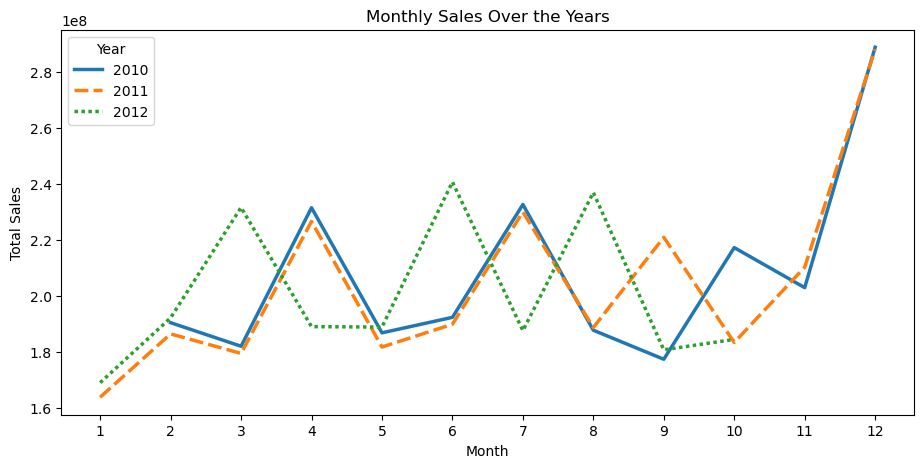

In [93]:
# Plotting monthly sales
plt. figure(figsize=(11, 5))
monthly_sales_plot = monthly_sales.unstack(level=0)
sns.lineplot(data=monthly_sales_plot, palette="tab10", linewidth=2.5)
plt.title( 'Monthly Sales Over the Years')
plt. ylabel( 'Total Sales')
plt. xlabel( 'Month')
plt. xticks(range(1, 13))
plt. legend (title='Year', labels=monthly_sales_plot.columns)
plt. show()

Statstical task

For Store 1 – Build prediction models to forecast demand
Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

In [96]:
from sklearn.model_selection import train_test_split
from sklearn. linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [101]:
# filter data for Store 1
store_1_data = df[df[ 'Store'] ==1]
# Restructure dates as numerical values starting from 1 for the earliest date
store_1_data = store_1_data.sort_values (by='Date')
store_1_data[ 'Date_Num'] = range(1, len(store_1_data) + 1)
store_1_data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Semester,Date_Num
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,H1,1
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,H1,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,H1,3
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,H1,4
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,H1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
138,1,2012-09-28,1437059.26,0,76.08,3.666,222.981658,6.908,2012,9,H2,139
139,1,2012-10-05,1670785.97,0,68.55,3.617,223.181477,6.573,2012,10,H2,140
140,1,2012-10-12,1573072.81,0,62.99,3.601,223.381296,6.573,2012,10,H2,141
141,1,2012-10-19,1508068.77,0,67.97,3.594,223.425723,6.573,2012,10,H2,142


In [106]:
# Selecting features and target variable
X = store_1_data[ ['Date_Num','CPI', 'Unemployment', 'Fuel_Price']]
y = store_1_data[ 'Weekly_Sales']

In [107]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Building Linear Regression model
model = LinearRegression ()
model. fit(X_train, y_train)

LinearRegression()

In [109]:
#predicated on test data
y_pred=model.predict(X_test)
y_pred


array([1502389.51416645, 1574447.79322168, 1494317.82492915,
       1509445.85731739, 1505522.76077339, 1533303.65131562,
       1584368.53967685, 1563619.03530086, 1572778.90015421,
       1592273.77854847, 1625842.88594691, 1584193.02267336,
       1495103.4220233 , 1641981.40585461, 1549204.25532416,
       1517784.09471177, 1564988.41749227, 1584634.03324189,
       1579274.23304284, 1510850.15299831, 1496938.08851127,
       1591739.65363136, 1505445.78155883, 1515067.98664953,
       1498280.44619735, 1512766.04485826, 1552734.96195751,
       1584693.42286255, 1505506.60430529])

In [113]:
#Evaluating the model 
mse=mean_squared_error(y_test,y_pred)

r2=r2_score(y_test,y_pred)
print('Mean square:',mse)
print('R2 score:',r2)

Mean square: 25450683128.850174
R2 score: 0.001987845196450122
